<a href="https://colab.research.google.com/github/ayushsyntax/ML_Journey/blob/main/FeatureEngineering(Standardized).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')


In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
df = df.iloc[:,2:]


In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
326,41,72000,0
280,59,88000,1
296,42,73000,1
106,26,35000,0
236,40,57000,0


Train test split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),df['Purchased'],test_size= .2,random_state = 0)


X_train.shape,X_test.shape

((320, 2), (80, 2))

##StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

In [10]:
X_train

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [11]:
X_train_scaled

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


##Effect of Scaling

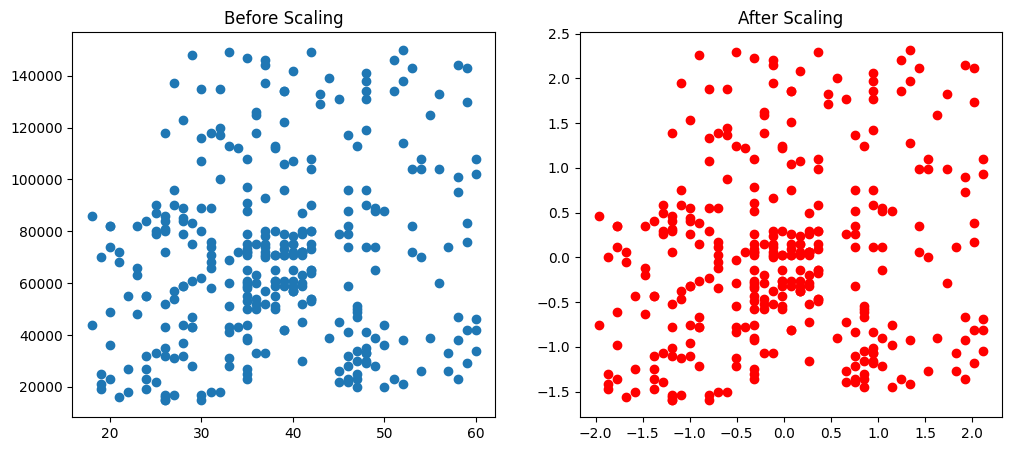

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

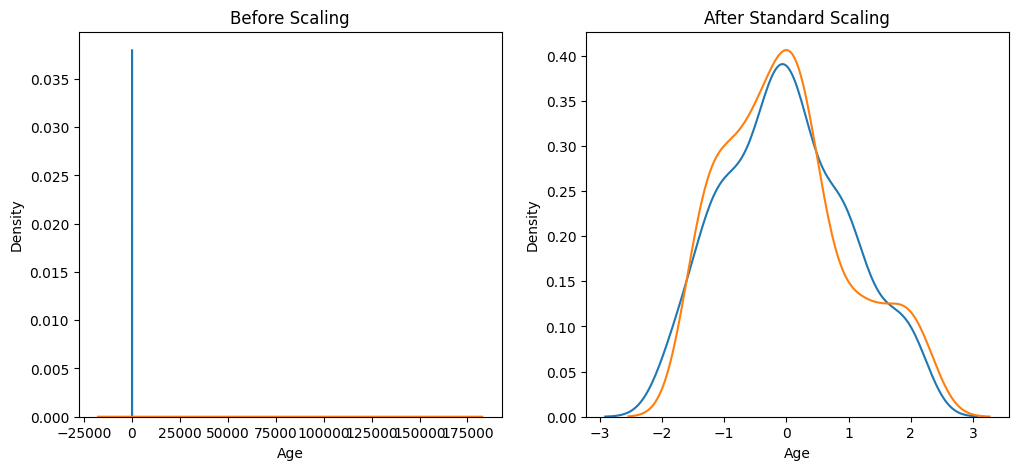

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

##Comparison of Distributions

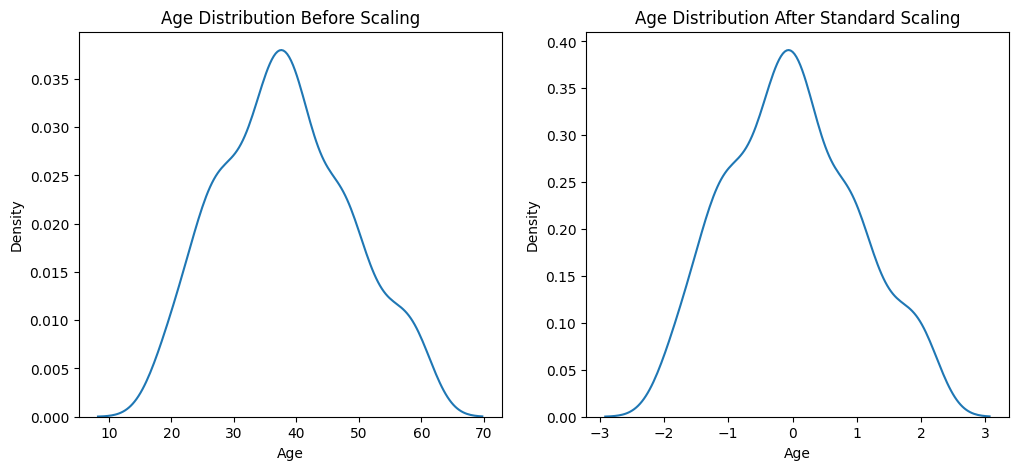

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

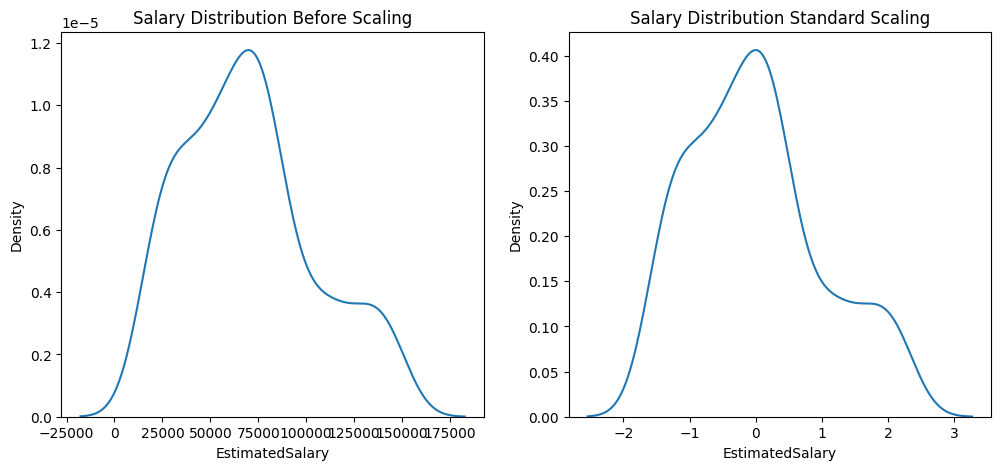

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

Key Observations

Shape Preservation :
Scaling does not alter the shape of the distribution. It only changes the scale of the values.

Mean and Variance :
After scaling, the mean of the feature becomes 0, and the standard deviation becomes 1.

Improved Model Performance :
Many machine learning algorithms (e.g., logistic regression, SVM, k-means) perform better when features are on similar scales.

##Why Scaling is Important?

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [23]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.925


In [27]:
from sklearn.tree import DecisionTreeClassifier


In [28]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()


In [29]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [30]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.925


In [31]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


##Effect Of Outlier

In [37]:
# New rows to append
new_rows = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

In [38]:
# Append using pd.concat()
df = pd.concat([df, new_rows], ignore_index=True)

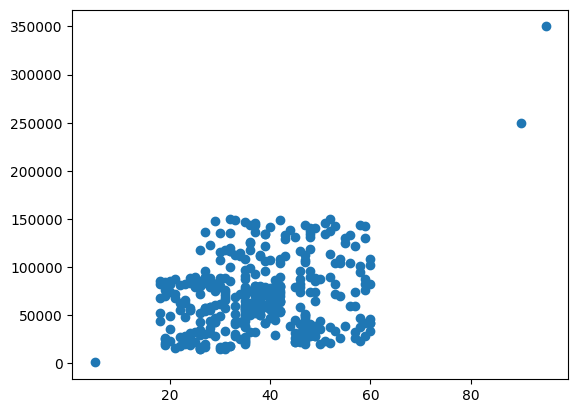

In [39]:
plt.scatter(df['Age'], df['EstimatedSalary'])



In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape


((282, 2), (121, 2))

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

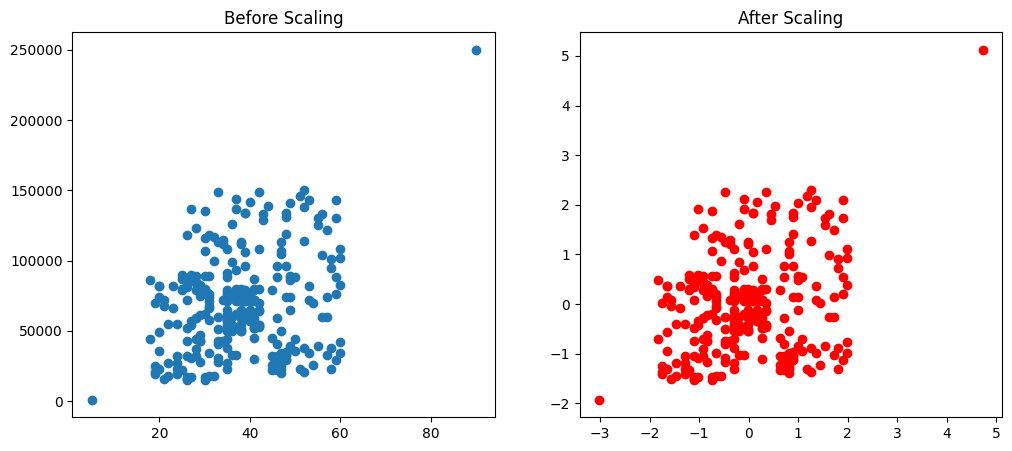

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()


Handles Outliers Better Than Normalization

Characteristic : Standardization is less affected by outliers compared to normalization.

Explanation : Since standardization uses the mean and standard deviation, extreme values (outliers) have less impact on the scaling process compared to normalization, which relies on the minimum and maximum values.

#Key Characteristics of Standardization

Mean Centering :
The mean of each feature becomes 0 after standardization.

Unit Variance :
The standard deviation of each feature becomes 1 .

Preserves Distribution Shape :
The shape of the original distribution is preserved (e.g., normal, skewed).

Z-Score Transformation :
Each value is transformed into a z-score , representing how many standard deviations it is from the mean.

Scales Features to Comparable Magnitudes :
Ensures all features contribute equally to algorithms sensitive to feature scales.

Handles Outliers Better :
Less sensitive to outliers compared to normalization (min-max scaling).

Unbounded Output :
Standardized values can range from −∞ to +∞.

Algorithm Suitability :
Preferred for algorithms like:
Distance-based methods (e.g., k-means, k-NN).

Gradient-based methods (e.g., logistic regression, neural networks).
Matrix operations (e.g., PCA, SVM).

Reversibility :
Standardization is reversible if the original mean and standard deviation are known.

Implemented with StandardScaler :
In scikit-learn, use StandardScaler for standardization

###IN ONE SHOT

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Create a sample dataset
data = {
    'Age': [22, 25, 35, 40, 45],
    'EstimatedSalary': [50000, 60000, 70000, 80000, 90000]
}
df = pd.DataFrame(data)

# Step 2: Initialize the scaler
scaler = StandardScaler()

# Step 3: Fit and transform the data
df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

# Step 4: Print the standardized data
print("Standardized DataFrame:")
print(df_standardized)

# Step 5: Verify the mean and standard deviation
print("\nMean of Standardized Data:")
print(df_standardized.mean())
print("\nStandard Deviation of Standardized Data:")
print(df_standardized.std())

Standardized DataFrame:
        Age  EstimatedSalary
0 -1.305610        -1.414214
1 -0.962028        -0.707107
2  0.183243         0.000000
3  0.755879         0.707107
4  1.328515         1.414214

Mean of Standardized Data:
Age                2.220446e-16
EstimatedSalary   -4.440892e-17
dtype: float64

Standard Deviation of Standardized Data:
Age                1.118034
EstimatedSalary    1.118034
dtype: float64
